# Building a model predict how many calories were burned during a workout
## Step 1: Relavant libraries and data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv(r'playground-series-s5e5\train.csv')
test_data = pd.read_csv(r'playground-series-s5e5\test.csv')

In [3]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
train_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
test_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [6]:
train_data.dtypes

id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [7]:
train_data.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

# 2 Exploratory Data Analysis

## 2.1 Analyzing Feature Distributions

In [8]:
train_data['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

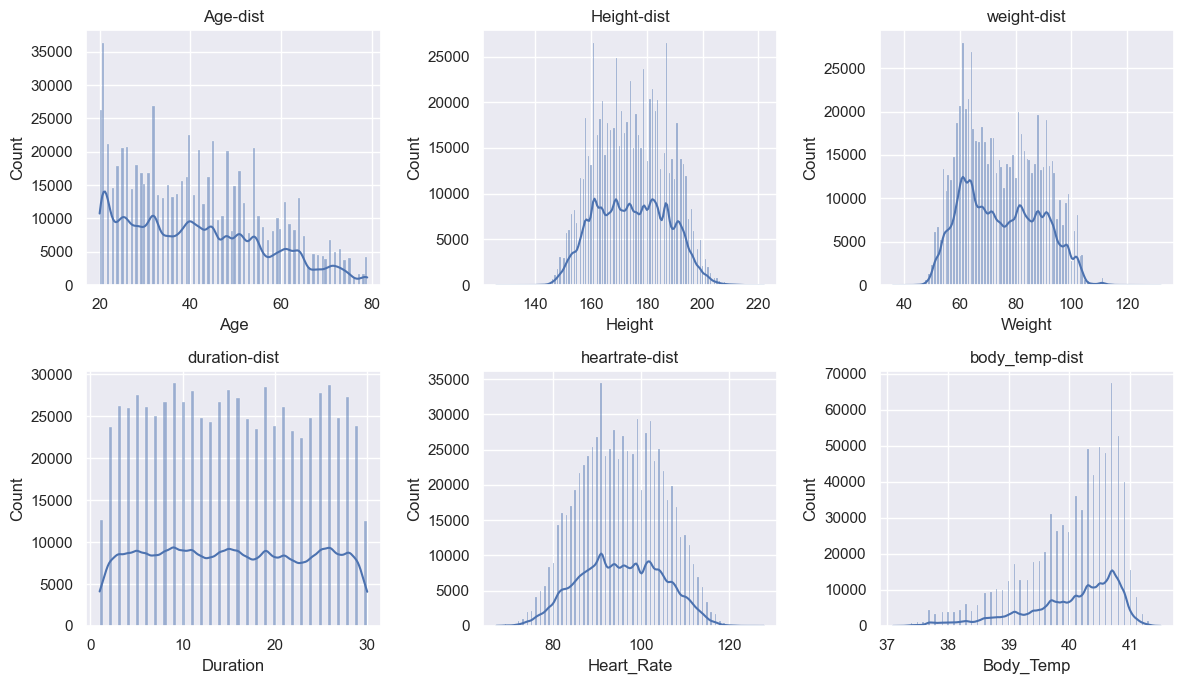

In [9]:
fig, axes = plt.subplots(2,3, figsize = (12, 7))
sns.histplot(train_data['Age'],kde = True, ax = axes[0,0])
axes[0,0].set_title('Age-dist')

sns.histplot(train_data['Height'],kde = True, ax = axes[0,1])
axes[0,1].set_title('Height-dist')

sns.histplot(train_data['Weight'],kde = True, ax = axes[0,2])
axes[0,2].set_title('weight-dist')

sns.histplot(train_data['Duration'],kde = True, ax = axes[1,0])
axes[1,0].set_title('duration-dist')

sns.histplot(train_data['Heart_Rate'],kde = True, ax = axes[1,1])
axes[1,1].set_title('heartrate-dist')

sns.histplot(train_data['Body_Temp'],kde = True, ax = axes[1,2])
axes[1,2].set_title('body_temp-dist')

plt.tight_layout()
plt.show()

In [10]:
train_data.describe(include = 'all')

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,374999.500000,NaN,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,NaN,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,NaN,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,NaN,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,NaN,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,NaN,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


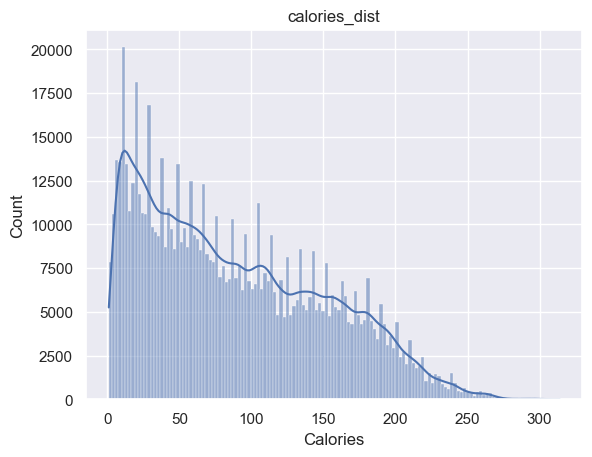

In [13]:
fig, ax = plt.subplots()
sns.histplot(train_data['Calories'], kde = True)
ax.set_title('calories_dist')
plt.show()

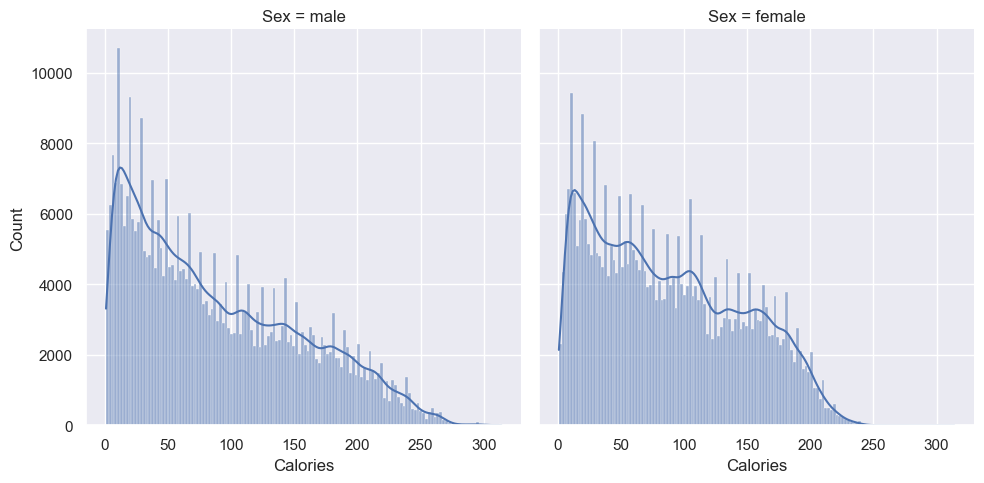

In [14]:
sns.displot(data = train_data,x = 'Calories', kde = True, col = 'Sex')

<Axes: xlabel='Sex', ylabel='count'>

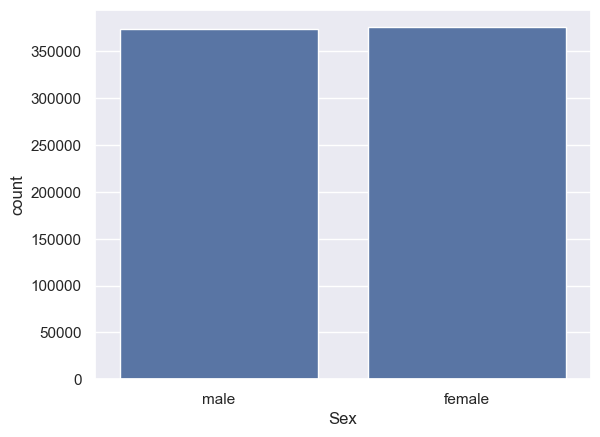

In [15]:
sns.countplot(train_data, x= 'Sex')

## 2.2 Relations between features and Target

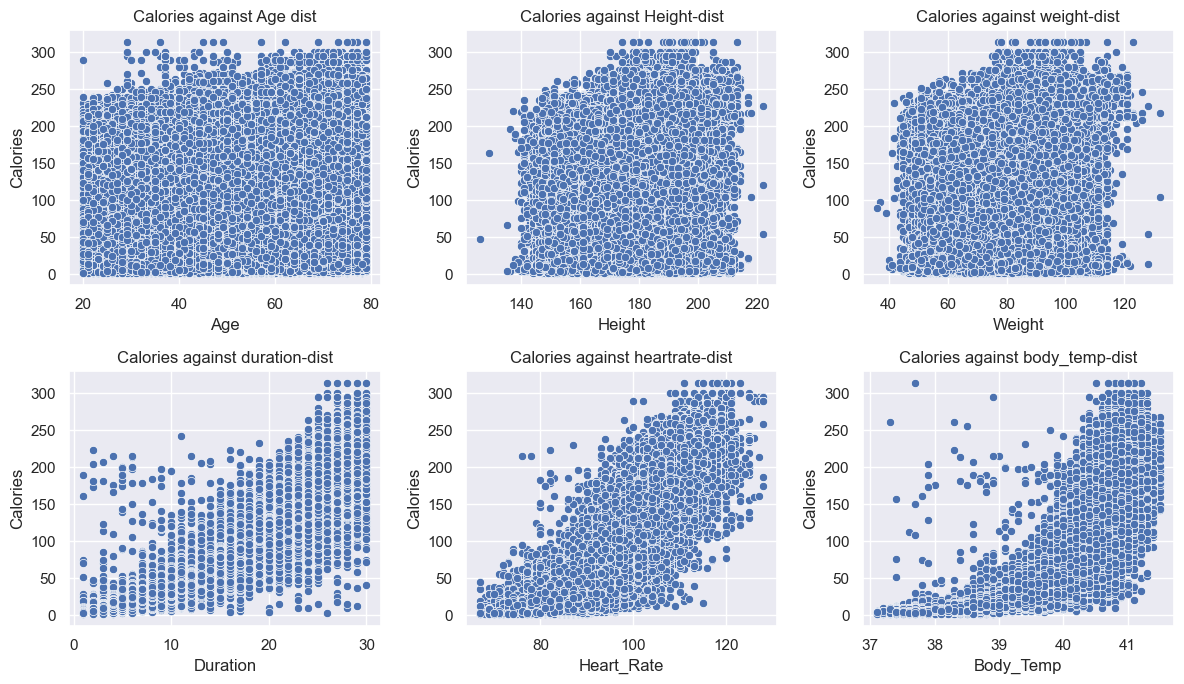

In [16]:
fig, axes = plt.subplots(2,3, figsize = (12, 7))
sns.scatterplot(data = train_data, x = 'Age', y = 'Calories', ax = axes[0,0])
axes[0,0].set_title('Calories against Age dist')

sns.scatterplot(data = train_data, x = 'Height', y = 'Calories', ax = axes[0,1])
axes[0,1].set_title('Calories against Height-dist')

sns.scatterplot(data = train_data, x = 'Weight', y = 'Calories', ax = axes[0,2])
axes[0,2].set_title('Calories against weight-dist')

sns.scatterplot(data = train_data, x = 'Duration', y = 'Calories', ax = axes[1,0])
axes[1,0].set_title('Calories against duration-dist')

sns.scatterplot(data = train_data, x = 'Heart_Rate', y = 'Calories', ax = axes[1,1])
axes[1,1].set_title('Calories against heartrate-dist')

sns.scatterplot(data = train_data, x = 'Body_Temp', y = 'Calories', ax = axes[1,2])
axes[1,2].set_title('Calories against body_temp-dist')

plt.tight_layout()
plt.show()

In [17]:
num_cols = [col for col in train_data.columns if train_data.dtypes[col] != 'O']

In [18]:
num_cols

['id',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [19]:
train_corr = train_data[num_cols].corr()

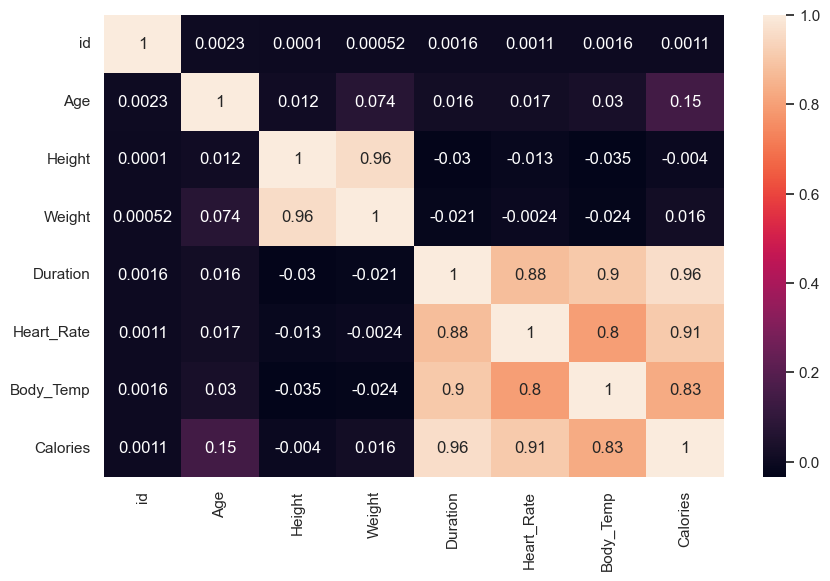

In [20]:
plt.figure(figsize = (10, 6))
sns.heatmap(train_corr, annot = True)
plt.show()

<Axes: xlabel='Sex', ylabel='Calories'>

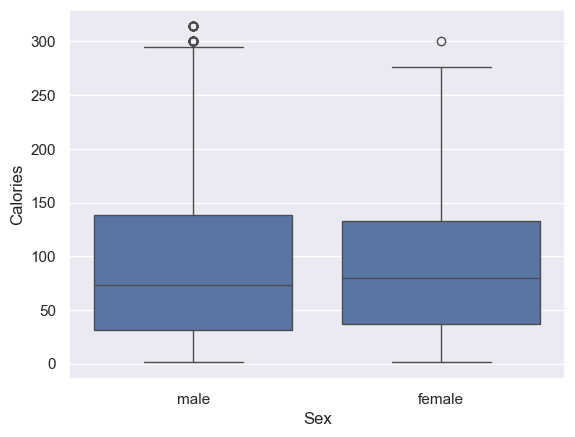

In [21]:
sns.boxplot(data = train_data, x = 'Sex', y = 'Calories')

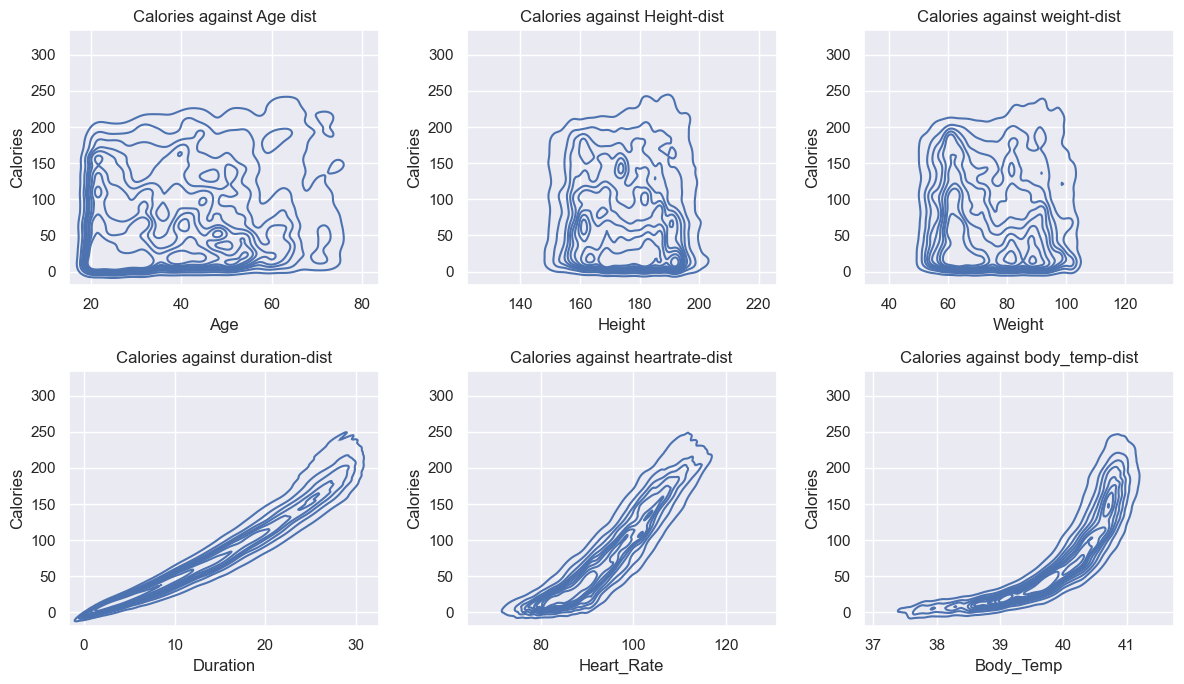

In [22]:
fig, axes = plt.subplots(2,3, figsize = (12, 7))
sns.kdeplot(data = train_data, x = 'Age', y = 'Calories', ax = axes[0,0])
axes[0,0].set_title('Calories against Age dist')

sns.kdeplot(data = train_data, x = 'Height', y = 'Calories', ax = axes[0,1])
axes[0,1].set_title('Calories against Height-dist')

sns.kdeplot(data = train_data, x = 'Weight', y = 'Calories', ax = axes[0,2])
axes[0,2].set_title('Calories against weight-dist')

sns.kdeplot(data = train_data, x = 'Duration', y = 'Calories', ax = axes[1,0])
axes[1,0].set_title('Calories against duration-dist')

sns.kdeplot(data = train_data, x = 'Heart_Rate', y = 'Calories', ax = axes[1,1])
axes[1,1].set_title('Calories against heartrate-dist')

sns.kdeplot(data = train_data, x = 'Body_Temp', y = 'Calories', ax = axes[1,2])
axes[1,2].set_title('Calories against body_temp-dist')

plt.tight_layout()
plt.show()

# Model 1
## Linear Regression

In [23]:
train_data.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

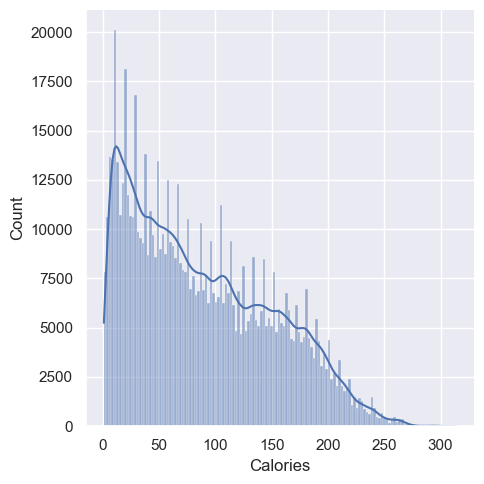

In [24]:
sns.displot(data = train_data, x = 'Calories', kde = True)
plt.show()

In [25]:
log_target_data = np.log(train_data['Calories'])

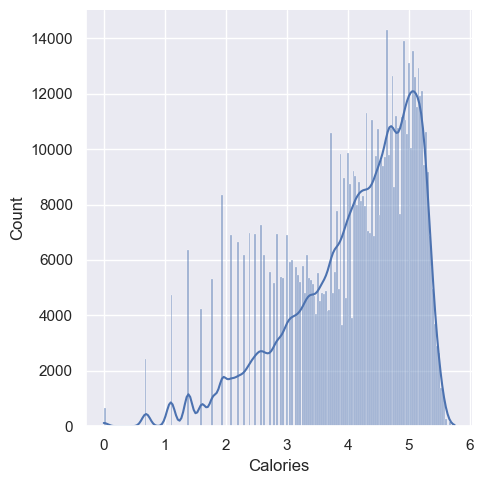

In [26]:
sns.displot(log_target_data, kde = True)
plt.show()

In [27]:
from sklearn.preprocessing import PowerTransformer

In [28]:
pt = PowerTransformer(method='box-cox')
transformed_data = pt.fit_transform(train_data['Calories'].values.reshape(-1,1))

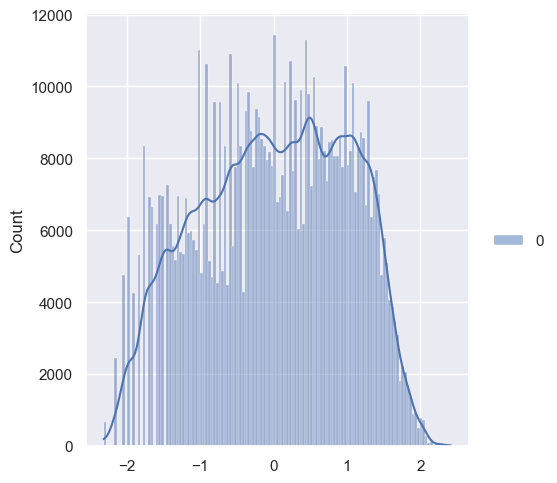

In [29]:
sns.displot(transformed_data, kde = True)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import root_mean_squared_error, make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
num_cols = [ 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
cat_cols = ['Sex']

In [32]:
cat_encoding = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
num_stadardizing = StandardScaler()

column_transformer = ColumnTransformer(
    [
        ('categoricals', cat_encoding, cat_cols),
        ('num_standadizing', num_stadardizing, num_cols),
    ],
    remainder = 'drop',
    verbose_feature_names_out = False,
    sparse_threshold = 0
)

In [33]:
def rmse_inverse(y_true, y_pred, pt):
    y_pred_original = pt.inverse_transform(y_pred.reshape(-1,1)).flatten()
    y_true_original = pt.inverse_transform(y_true.reshape(-1, 1)).flatten()
    return np.sqrt(mean_squared_error(y_true_original, y_pred_original))

In [34]:
model_1 = LinearRegression()

rmse = make_scorer((lambda y_true, y_pred: rmse_inverse(y_true, y_pred, pt)) , greater_is_better=False)
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
model_2 = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], cv = cv, scoring=rmse)

model_pipeline_1 = Pipeline(
    [
        ('preprocessing', column_transformer),
        ('modeling', model_1)
    ]
)

model_pipeline_2 = Pipeline(
    [
        ('preprocessing', column_transformer),
        ('modeling', model_2)
    ]
)
cv_scores_1 = cross_validate(
    estimator=model_pipeline_1,
    X = train_data,
    y = transformed_data,
    cv = cv,
    scoring = rmse,
    return_estimator=True,
    return_train_score=True
)

In [35]:
np.mean(cv_scores_1['test_score'])

np.float64(-7.5599863613372325)

In [36]:
cv_scores_1 = cross_validate(
    estimator=model_pipeline_1,
    X = train_data,
    y = train_data['Calories'],
    cv = cv,
    scoring = rmse,
    return_estimator=True,
    return_train_score=True
)

C:\Users\HP PROBOOK\anaconda3\envs\py3_mainenv\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP PROBOOK\anaconda3\envs\py3_mainenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\HP PROBOOK\anaconda3\envs\py3_mainenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP PROBOOK\anaconda3\envs\py3_mainenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^

In [37]:
rmse = make_scorer

In [38]:
np.mean(cv_scores_1['test_score'])

np.float64(nan)

In [39]:
model_pipeline_2.fit(train_data, transformed_data)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('categoricals',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex']),
                                                 ('num_standadizing',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])],
                                   verbose_feature_names_out=False)),
                ('modeling',
                 RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         cv=KFold(n_splits=5, random_state=42, shuffle=True),
                         scoring=make_scorer(<lambda>, greater_is_better=False, response_method='predict')))])

In [40]:
model_pipeline_2.named_steps['modeling'].alpha_

np.float64(1000.0)

In [41]:
model_pipeline_2.named_steps['modeling'].best_score_

np.float64(-7.554485485897295)